### Project_Summary

**Domain: Telecom**


A telecom company wants to use their historical customer data to predict behaviour to retain customers. Relevant customer data can be analysed and focused customer retention programs can be developed.

Each row represents a customer, each column contains customer’s attributes such as:

• Churn- Customers who left within the last month, 
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
protection, tech support, and streaming TV and movies
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly 
charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents

The purpose is to build a model that will help to identify the potential customers who have a higher probability to churn. 
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising 
customer retention

A GUI is also to be developed, to take the customer inputs and provide the possibility of churning out.

Tasks performed:

1. Importing and cleaning the data
2. EDA and visualisation
3. Data preprocessing
4. Model training, testing and tuning (Using all kinds of ensemble techniques)
5. GUI developement (GUI to take the customer data and provide the output)
6. Conclusion


## Importing the data

In [593]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle

In [594]:
# Loading the csv file
ds=pd.read_csv("TelcomCustomer-Churn.csv")

In [595]:
#Checking the shape and size of the data set
print(ds.shape)
print(ds.size)

(7043, 21)
147903


The data set has 7043 rows and 21 columns

In [596]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [597]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the data frame

In [598]:
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges datatype is object,so there must be some fields with the data other than numeric value

In [599]:
#Printing the unique values of the data set columns
for col in ds.columns:
    print(col+':',ds[col].unique())

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [600]:
#Checking any empty spaces are present in the all columns
for col in ds.columns:
    print(ds[(ds[col]==' ')].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Int64Index([], dtype='int64')


TotalCharges column has empty spaces in the above mentioned cells

In [601]:
#Checking any ? values are present in the all columns
for col in ds.columns:
    print(ds[(ds[col]=='?')].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


There are no cells with ? as data

In [602]:
#Printing the rows with empty spaces in the Total_Charges column
ds.loc[(ds[(ds['TotalCharges']==' ')].index),:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


From the above 11 columns, it is inferred that:

All the 11 rows have 0 years of duration and no value is present in the Total_charges column.

All the 11 rows, have Churn value as No.

As the duration is less, Total_Charges can be made equal to Monthly charges, assuming that just recently they subscribed to this company.

Or we can drop those rows.

In this case, Total_charges is taken equal to Monthly charges.

In [603]:
#Assigning monthly charges to Total charges as the tenure is low
ds.loc[(ds[(ds['TotalCharges']==' ')].index),'TotalCharges']=ds.loc[(ds[(ds['TotalCharges']==' ')].index),'MonthlyCharges']

In [604]:
#Verifying the Total charges update
ds.loc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],['TotalCharges','MonthlyCharges']]

,TotalCharges,MonthlyCharges
488,52.55,52.55
753,20.25,20.25
936,80.85,80.85
1082,25.75,25.75
1340,56.05,56.05
3331,19.85,19.85
3826,25.35,25.35
4380,20.00,20.00
5218,19.70,19.70
6670,73.35,73.35


In [605]:
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'], errors='coerce')

In [606]:
ds['TotalCharges'].isna().sum()#Checking the na values

0

In [607]:
ds.shape

(7043, 21)

## Relation between inputs and output

<AxesSubplot:xlabel='Churn', ylabel='count'>

<Figure size 1728x1728 with 0 Axes>

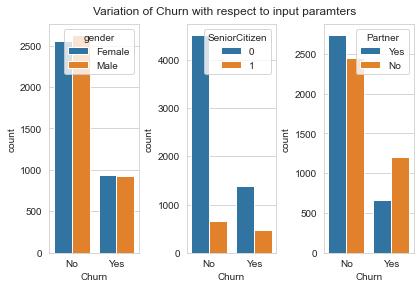

In [608]:
plt.figure(figsize=(24,24))
fig, ax = plt.subplots(1, 3)
fig.tight_layout(pad=2.0)
fig.suptitle("Variation of Churn with respect to input paramters")
sns.countplot(data=ds,x='Churn',hue='gender',ax=ax[0])
sns.countplot(data=ds,x='Churn',hue='SeniorCitizen',ax=ax[1])
sns.countplot(data=ds,x='Churn',hue='Partner',ax=ax[2])

**1.** There is no significant difference between the male and female in people who churned and not churned

**2.** Both Senior citizens and others, have less Churning out ratio.

**3.** In the total Churned out people, who have no partner tend to be Churned out

<AxesSubplot:xlabel='Churn', ylabel='count'>

<Figure size 1728x1728 with 0 Axes>

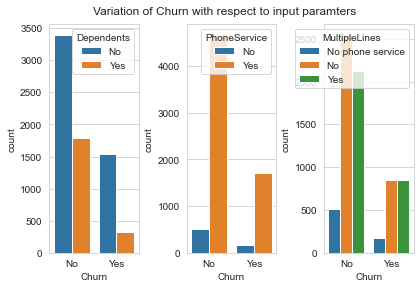

In [609]:
plt.figure(figsize=(24,24))
fig, ax = plt.subplots(1, 3)
fig.tight_layout(pad=2.0)
fig.suptitle("Variation of Churn with respect to input paramters")
sns.countplot(data=ds,x='Churn',hue='Dependents',ax=ax[0])
sns.countplot(data=ds,x='Churn',hue='PhoneService',ax=ax[1])
sns.countplot(data=ds,x='Churn',hue='MultipleLines',ax=ax[2])

**1.** The people who has Multiple lines and who has no connection has equal count of churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

<Figure size 1728x1728 with 0 Axes>

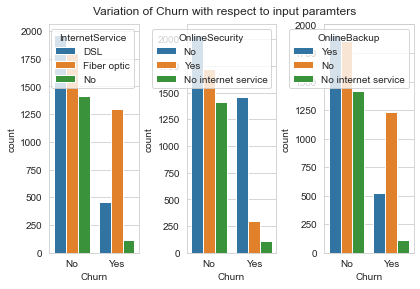

In [610]:
plt.figure(figsize=(24,24))
fig, ax = plt.subplots(1, 3)
fig.tight_layout(pad=2.0)
fig.suptitle("Variation of Churn with respect to input paramters")
sns.countplot(data=ds,x='Churn',hue='InternetService',ax=ax[0])
sns.countplot(data=ds,x='Churn',hue='OnlineSecurity',ax=ax[1])
sns.countplot(data=ds,x='Churn',hue='OnlineBackup',ax=ax[2])

**1.** The people who have the Fiber Optic Internet connection tend to be churned out. These services might not be supportive. So customers are churning out

**2.** The people who have no Online Security and no Online Backup tend to be churned out.

<AxesSubplot:xlabel='Churn', ylabel='count'>

<Figure size 1728x1728 with 0 Axes>

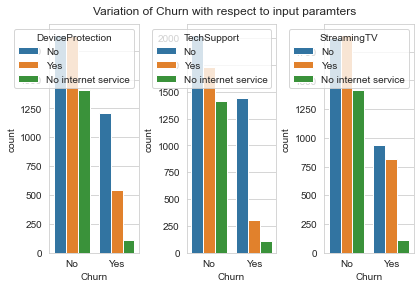

In [611]:
plt.figure(figsize=(24,24))
fig, ax = plt.subplots(1, 3)
fig.tight_layout(pad=2.0)
fig.suptitle("Variation of Churn with respect to input paramters")
sns.countplot(data=ds,x='Churn',hue='DeviceProtection',ax=ax[0])
sns.countplot(data=ds,x='Churn',hue='TechSupport',ax=ax[1])
sns.countplot(data=ds,x='Churn',hue='StreamingTV',ax=ax[2])

**1.** The people who have No Device Protection and No tech support tend to be churned out.

<AxesSubplot:xlabel='Churn', ylabel='count'>

<Figure size 1728x1728 with 0 Axes>

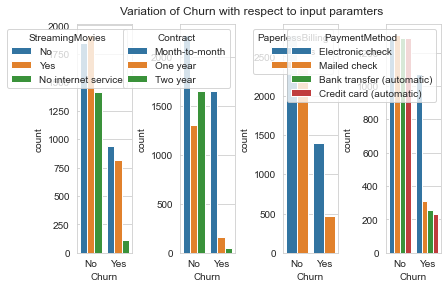

In [612]:
plt.figure(figsize=(24,24))
fig, ax = plt.subplots(1, 4)
fig.tight_layout(pad=2.0)
fig.suptitle("Variation of Churn with respect to input paramters")
sns.countplot(data=ds,x='Churn',hue='StreamingMovies',ax=ax[0])
sns.countplot(data=ds,x='Churn',hue='Contract',ax=ax[1])
sns.countplot(data=ds,x='Churn',hue='PaperlessBilling',ax=ax[2])
sns.countplot(data=ds,x='Churn',hue='PaymentMethod',ax=ax[3])

**1.** People who have no internet connection for Streaming movies less tendency to be churned out

**2.** People who have one year subscription and 2 year subscription have less tendency to be churned out

**3.** People who pay through Electronic check has more tendency to be churned out

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

<Figure size 1728x720 with 0 Axes>

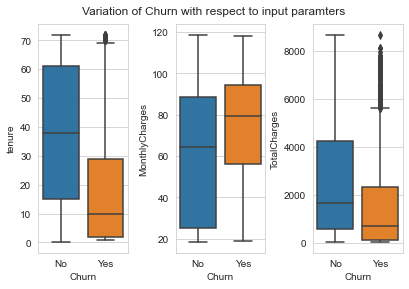

In [613]:
plt.figure(figsize=(24,10))
fig, ax = plt.subplots(1, 3)
fig.tight_layout(pad=2.0)
fig.suptitle("Variation of Churn with respect to input paramters")

sns.boxplot(data=ds,x='Churn',y='tenure',ax=ax[0])
sns.boxplot(data=ds,x='Churn',y='MonthlyCharges',ax=ax[1])
sns.boxplot(data=ds,x='Churn',y='TotalCharges',ax=ax[2])

**1.** The mean tenure of churned out people is low compared mean tenure of people who remain. So recent subscribed people will have more chances of churned out.

**2.** The mean of Monthly charges of churned out people is more compared to the mean of monthly charges for people who remain.

**3.** The mean of Total charges of churned out people is low compared to the mean of Total charges for people who remain.

In [614]:
#Checking the proportion of Yes and No of the Churn variable
ds.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [615]:
#Dropping the CustomerID as it is not significant
ds.drop('customerID',axis=1,inplace=True)

In [616]:
#Performing Label Encoding for all object type data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in ds.columns:
    if ds[i].dtype == 'O':
        ds[i] = le.fit_transform(ds[i])
    else:
        pass

In [617]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [618]:
ds.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [619]:
X=ds.drop('Churn',axis=1)
y=ds['Churn']

In [620]:
#Splitting the data into Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 1)

In [621]:
#Applying the SMOTE for the training data
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=2)
X_train_SMOTE, y_train_SMOTE=smt.fit_resample(X_train,y_train)

In [622]:
sum(y_train_SMOTE==1)/len(y_train_SMOTE)

0.5

## Getting accuracies for the models with the direct data and SMOTE data

In [623]:
#DecisionTreeClassifier with direct data
model=DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
acc_dt=model.score(X_train, y_train)
acc_val_dt=model.score(X_test, y_test)
print(f"Train accuracy:{acc_dt}\nTest Accuracy:{acc_val_dt}")

Train accuracy:0.9979716024340771
Test Accuracy:0.7297681022243256


In [624]:
#DecisionTreeClassifier with SMOTE data
model.fit(X_train_SMOTE, y_train_SMOTE)
acc_dt_sm=model.score(X_train_SMOTE, y_train_SMOTE)
acc_val_dt_sm=model.score(X_test, y_test)
print(f"Train accuracy (smote):{acc_dt_sm}\nTest Accuracy (smote):{acc_val_dt_sm}")

Train accuracy (smote):0.9986068542769574
Test Accuracy (smote):0.7335541883577852


In [625]:
#BaggingClassifier with direct data
model_2=BaggingClassifier(random_state=1,n_estimators=100)
model_2.fit(X_train, y_train)
acc_bgg=model_2.score(X_train, y_train)
acc_val_bgg=model_2.score(X_test, y_test)
print(f"Train accuracy:{acc_bgg}\nTest Accuracy:{acc_val_bgg}")

Train accuracy:0.9979716024340771
Test Accuracy:0.7983909133932797


In [626]:
#BaggingClassifier with SMOTE data
model_2.fit(X_train_SMOTE, y_train_SMOTE)
acc_bgg_sm=model_2.score(X_train_SMOTE, y_train_SMOTE)
acc_val_bgg_sm=model_2.score(X_test, y_test)
print(f"Train accuracy (smote):{acc_bgg_sm}\nTest Accuracy (smote):{acc_val_bgg_sm}")

Train accuracy (smote):0.9986068542769574
Test Accuracy (smote):0.7865593942262187


In [627]:
#GradientBoostingClassifier with direct data
model_3=GradientBoostingClassifier(learning_rate=0.1,n_estimators=50)
model_3.fit(X_train, y_train)
acc_gb=model_3.score(X_train, y_train)
acc_val_gb=model_3.score(X_test, y_test)
print(f"Train accuracy:{acc_gb}\nTest Accuracy:{acc_val_gb}")

Train accuracy:0.8164300202839757
Test Accuracy:0.8116422148603881


In [628]:
#GradientBoostingClassifier with SMOTE data
model_3.fit(X_train_SMOTE, y_train_SMOTE)
acc_gb_sm=model_3.score(X_train_SMOTE, y_train_SMOTE)
acc_val_gb_sm=model_3.score(X_test, y_test)
print(f"Train accuracy (smote):{acc_gb_sm}\nTest Accuracy (smote):{acc_val_gb_sm}")

Train accuracy (smote):0.8301755363611034
Test Accuracy (smote):0.77520113582584


In [629]:
#AdaBoostClassifier with direct data
model_4=AdaBoostClassifier(learning_rate=0.1,n_estimators=50)
model_4.fit(X_train, y_train)
acc_ab=model_4.score(X_train, y_train)
acc_val_ab=model_4.score(X_test, y_test)
print(f"Train accuracy:{acc_ab}\nTest Accuracy:{acc_val_ab}")

Train accuracy:0.7922920892494929
Test Accuracy:0.808329389493611


In [630]:
#AdaBoostClassifier with SMOTE data
model_4.fit(X_train_SMOTE, y_train_SMOTE)
acc_ab_sm=model_4.score(X_train_SMOTE, y_train_SMOTE)
acc_val_ab_sm=model_4.score(X_test, y_test)
print(f"Train accuracy (smote):{acc_ab_sm}\nTest Accuracy (smote):{acc_val_ab_sm}")

Train accuracy (smote):0.7872666480913904
Test Accuracy (smote):0.7449124467581637


In [631]:
#RandomForestClassifier with direct data
model_5=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=1)
model_5.fit(X_train, y_train)
acc_rf=model_5.score(X_train, y_train)
acc_val_rf=model_5.score(X_test, y_test)
print(f"Train accuracy:{acc_rf}\nTest Accuracy:{acc_val_rf}")

Train accuracy:0.9979716024340771
Test Accuracy:0.7974443918599148


In [632]:
#RandomForestClassifier with SMOTE data
model_5.fit(X_train_SMOTE, y_train_SMOTE)
acc_rf_sm=model_5.score(X_train_SMOTE, y_train_SMOTE)
acc_val_rf_sm=model_5.score(X_test, y_test)
print(f"Train accuracy (smote):{acc_rf_sm}\nTest Accuracy (smote):{acc_val_rf_sm}")

Train accuracy (smote):0.9986068542769574
Test Accuracy (smote):0.7893989588263133


In [633]:
#XGBClassifier with direct data
from xgboost import XGBClassifier
model_6=XGBClassifier(learning_rate=0.1, n_estimators=100,use_label_encoder=False)
model_6.fit(X_train, y_train)
acc_xgb=model_6.score(X_train, y_train)
acc_val_xgb=model_6.score(X_test, y_test)
print(f"Train accuracy:{acc_xgb}\nTest Accuracy:{acc_val_xgb}")

[22:30:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:0.8724137931034482
Test Accuracy:0.8064363464268812


In [634]:
#XGBClassifier with SMOTE data
model_6.fit(X_train_SMOTE, y_train_SMOTE)
acc_xgb_sm=model_6.score(X_train_SMOTE, y_train_SMOTE)
acc_val_xgb_sm=model_6.score(X_test, y_test)
print(f"Train accuracy (smote):{acc_xgb_sm}\nTest Accuracy (smote):{acc_val_xgb_sm}")

[22:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy (smote):0.8995541933686264
Test Accuracy (smote):0.7903454803596782


In [635]:
#Fitting all the models' accuracies into one data frame
acc_dict={'Model':['Dec_T','Bagg','Grad_b','Ada_b','Rand_f','XG_b'],
          'Train_Acc':[acc_dt, acc_bgg, acc_gb, acc_ab, acc_rf, acc_xgb],
          'Test_Acc':[acc_val_dt, acc_val_bgg, acc_val_gb, acc_val_ab, acc_val_rf, acc_val_xgb],
          'Train_Acc_Sm':[acc_dt_sm, acc_bgg_sm, acc_gb_sm, acc_ab_sm, acc_rf_sm, acc_xgb_sm],
          'Test_Acc_Sm':[acc_val_dt_sm, acc_val_bgg_sm, acc_val_gb_sm, acc_val_ab_sm, acc_val_rf_sm, acc_val_xgb_sm]}
ds_acc=pd.DataFrame(acc_dict)
ds_acc=ds_acc.set_index('Model')
print(ds_acc)

        Train_Acc  Test_Acc  Train_Acc_Sm  Test_Acc_Sm
Model                                                 
Dec_T    0.997972  0.729768      0.998607     0.733554
Bagg     0.997972  0.798391      0.998607     0.786559
Grad_b   0.816430  0.811642      0.830176     0.775201
Ada_b    0.792292  0.808329      0.787267     0.744912
Rand_f   0.997972  0.797444      0.998607     0.789399
XG_b     0.872414  0.806436      0.899554     0.790345


**Plotting the train and test accuracies with and without smote**

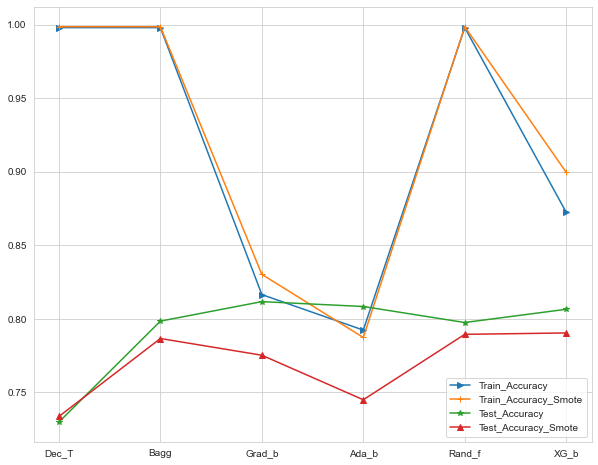

In [636]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
plt.plot(ds_acc['Train_Acc'],marker='>',label='Train_Accuracy')
plt.plot(ds_acc['Train_Acc_Sm'],marker='+',label='Train_Accuracy_Smote')
plt.plot(ds_acc['Test_Acc'],marker='*',label='Test_Accuracy')
plt.plot(ds_acc['Test_Acc_Sm'],marker='^',label='Test_Accuracy_Smote')
plt.legend()

From the above graph, it can be understood that train accuracies for direct data(blue) and data after smote(Orange) have no much differences.

In the same way, test accuracies for direct data(Green) is higher than for the data after smote(Red) except in case of Decision tree model

So the smote is not considered to find the best model by using Grid Search algorithm

**GridSearchCV for all the models with tuning parameters

In [637]:
#Grid Search function to be called different models and parameters
def Grid_Search_CV(X,y,model, param, fold):
    gs_model=GridSearchCV(estimator=model,param_grid=param,cv=fold)
    gs_model.fit(X,y)
    best_params=gs_model.best_params_
    return gs_model.best_estimator_,best_params

**Finding the best parameters for DecisionTreeClassifier using Grid Search**

In [638]:
param={'criterion':['gini','entropy'],'max_depth':np.arange(5,25)}
dt_model,dt_best_params=Grid_Search_CV(X_train,y_train,DecisionTreeClassifier(),param,5)
print(dt_model,dt_best_params)

DecisionTreeClassifier(criterion='entropy', max_depth=6) {'criterion': 'entropy', 'max_depth': 6}


In [639]:
acc_dt_gs=dt_model.score(X_train,y_train)
acc_val_dt_gs=dt_model.score(X_test,y_test)
dt_predict=dt_model.predict(X_test)
f1_dt_gs=metrics.f1_score(y_test,dt_predict,average='micro')
print(acc_dt_gs,acc_val_dt_gs,f1_dt_gs)

0.8073022312373225 0.795551348793185 0.795551348793185


Decision tree classifier with entropy as criteria and max_depth of 6 has good accuracy and f1 score

**Finding the best parameters for BaggingClassifier using Grid Search**

In [640]:
param={'n_estimators':[10,50,100],'random_state':[1]}
bgg_model,bgg_best_params=Grid_Search_CV(X_train,y_train,BaggingClassifier(),param,5)
print(bgg_model,bgg_best_params)

BaggingClassifier(n_estimators=50, random_state=1) {'n_estimators': 50, 'random_state': 1}


In [641]:
acc_bgg_gs=bgg_model.score(X_train,y_train)
acc_val_bgg_gs=bgg_model.score(X_test,y_test)
bgg_predict=bgg_model.predict(X_test)
f1_bgg_gs=metrics.f1_score(y_test,bgg_predict,average='micro')
print(acc_bgg_gs,acc_val_bgg_gs,f1_bgg_gs)

0.9977687626774848 0.7993374349266446 0.7993374349266446


BaggingClassifier with n_estimators as 50 has good accuracy and f1 score

**Finding the best parameters for GradientBoostingClassifier using Grid Search**

In [642]:
param={'learning_rate':[0.01,0.05,0.1,0.2],'n_estimators':[50,100,200]}
gb_model,gb_best_params=Grid_Search_CV(X_train,y_train,GradientBoostingClassifier(),param,5)
print(gb_model,gb_best_params)

GradientBoostingClassifier(learning_rate=0.05) {'learning_rate': 0.05, 'n_estimators': 100}


In [643]:
acc_gb_gs=gb_model.score(X_train,y_train)
acc_val_gb_gs=gb_model.score(X_test,y_test)
gb_predict=gb_model.predict(X_test)
f1_gb_gs=metrics.f1_score(y_test,gb_predict,average='micro')
print(acc_gb_gs,acc_val_gb_gs,f1_gb_gs)

0.8162271805273834 0.8092759110269758 0.8092759110269758


Gradient Boosting Classifier with learning_rate of 0.05 and n_estimators of 100 has good accuracy and f1 score

**Finding the best parameters for AdaBoostClassifier using Grid Search**

In [644]:
param={'learning_rate':[0.05,0.1,0.2,0.4],'n_estimators':[50,100,200,300],'random_state':[1]}
ab_model,ab_best_params=Grid_Search_CV(X_train,y_train,AdaBoostClassifier(),param,5)
print(ab_model,ab_best_params)

AdaBoostClassifier(learning_rate=0.2, n_estimators=300, random_state=1) {'learning_rate': 0.2, 'n_estimators': 300, 'random_state': 1}


In [645]:
acc_ab_gs=ab_model.score(X_train,y_train)
acc_val_ab_gs=ab_model.score(X_test,y_test)
ab_predict=ab_model.predict(X_test)
f1_ab_gs=metrics.f1_score(y_test,ab_predict,average='micro')
print(acc_ab_gs,acc_val_ab_gs,f1_ab_gs)

0.8066937119675457 0.8106956933270232 0.8106956933270232


AdaBoostClassifier with learning_rate of 0.2 and n_estimators of 300 has good accuracy and f1 score

**Finding the best parameters for RandomForestClassifier using Grid Search**

In [646]:
param={'criterion':['gini','entropy'],'max_depth':np.arange(5,20),'n_estimators':[50,100,200],'random_state':[1]}
rf_model,rf_best_params=Grid_Search_CV(X_train,y_train,RandomForestClassifier(),param,5)
print(rf_model,rf_best_params)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=50,
                       random_state=1) {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 50, 'random_state': 1}


In [648]:
acc_rf_gs=rf_model.score(X_train,y_train)
acc_val_rf_gs=rf_model.score(X_test,y_test)
rf_predict=rf_model.predict(X_test)
f1_rf_gs=metrics.f1_score(y_test,rf_predict,average='micro')
print(acc_rf_gs,acc_val_rf_gs,f1_rf_gs)

0.8221095334685599 0.8130619971604354 0.8130619971604353


RandomForestClassifier with criterion as entropy,max_depth as 7 and n_estimators of 50 has good accuracy and f1 score

**Finding the best parameters for XGBClassifier using Grid Search**

In [649]:
import warnings
warnings.simplefilter('ignore')
param={'learning_rate':[0.05,0.1,0.2],'max_depth':np.arange(5,20),'n_estimators':[50,100,200],'random_state':[1],'use_label_encoder':[False]}
xgb_model,xgb_best_params=Grid_Search_CV(X_train,y_train,XGBClassifier(),param,5)
print(xgb_model,xgb_best_params)

[22:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [650]:
acc_xgb_gs=xgb_model.score(X_train,y_train)
acc_val_xgb_gs=xgb_model.score(X_test,y_test)
xgb_predict=xgb_model.predict(X_test)
f1_xgb_gs=metrics.f1_score(y_test,xgb_predict,average='micro')
print(acc_xgb_gs,acc_val_xgb_gs,f1_xgb_gs)

0.8223123732251522 0.812588736393753 0.812588736393753


XGBClassifier with learning_rate of 0.05, max_depth as 5 and n_estimators as 50 has good accuracy and f1 score

In [651]:
acc_dict_gs={'Model':['Dec_T_gs','Bagg_gs','Grad_b_gs','Ada_b_gs','Rand_f_gs','XG_b_gs'],
          'Train_Acc':[acc_dt_gs, acc_bgg_gs, acc_gb_gs, acc_ab_gs, acc_rf_gs, acc_xgb_gs],
          'Test_Acc':[acc_val_dt_gs, acc_val_bgg_gs, acc_val_gb_gs, acc_val_ab_gs, acc_val_rf_gs, acc_val_xgb_gs],
          'F1_Score':[f1_dt_gs, f1_bgg_gs, f1_gb_gs, f1_ab_gs, f1_rf_gs, f1_xgb_gs]}

acc_dict_gs_df=pd.DataFrame(acc_dict_gs)
acc_dict_gs_df=acc_dict_gs_df.set_index('Model')
print(acc_dict_gs_df)

           Train_Acc  Test_Acc  F1_Score
Model                                   
Dec_T_gs    0.807302  0.795551  0.795551
Bagg_gs     0.997769  0.799337  0.799337
Grad_b_gs   0.816227  0.809276  0.809276
Ada_b_gs    0.806694  0.810696  0.810696
Rand_f_gs   0.822110  0.813062  0.813062
XG_b_gs     0.822312  0.812589  0.812589


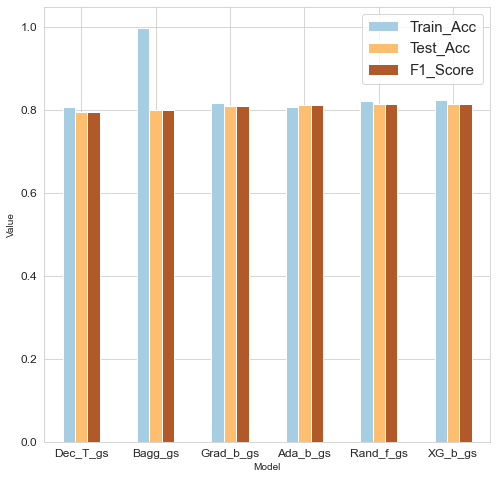

In [652]:
ax=acc_dict_gs_df.plot(kind='bar',rot=0,figsize=(8,8),fontsize=12,colormap='Paired')
ax.legend(bbox_to_anchor=(1,1),prop={'size':15})
ax.set_ylabel("Value",fontsize=10)
ax.set_xlabel("Model",fontsize=10)
plt.show()

From the above graph, it can be known that Bagging grid search gave good train accuracy, but the difference between train and test accuracy is more.

And out of all models, Random forest classifier and XGboost classifier have slightly more test accuracy.

In the Random forest and XGboost classifiers, Random forest classifier is considered to pickle the model and predict the output.

## Pickling the RandomForestClassifier model

In [654]:
model_p=RandomForestClassifier(criterion= 'entropy', max_depth= 7, n_estimators= 50, random_state=1)
model_p.fit(X_train, y_train)
print(model_p.score(X_train, y_train))
print(model_p.score(X_test, y_test))
pickle_model = open('finalized_model.pkl', 'wb')#Creating a file with write mode
pickle.dump(model_2,pickle_model)#Dumping the model into one file
pickle_model.close()#Closing the file

0.8221095334685599
0.8130619971604354


# GUI and Unpickling the model

**Steps:**
In the below code:

**1.** First individual labels are created for the inputs information

**2.** Input entry boxes and drop down boxes are created beside the labels to enter the inputs

**3.** Submit button is created to process the data

**4.** Predict button is created, which unpickles the model from the saved file and gives the predicted output in the beside box

In [669]:
#Importing tkinter module for GUI
import tkinter as tk
from sklearn import preprocessing

In [670]:
Tk_mod=tk.Tk()
Tk_mod.title('Customer Churn Prediction GUI')
#Creating empty global data frame
X=pd.DataFrame()

#Function for predicting the output from unpickled model
def Predict_y():
    pickle_model_1 = open('finalized_model.pkl', 'rb')
    model_1=pickle.load(pickle_model_1)
    global X
    print(X)
    predicted_value=model_1.predict(X)
    print(predicted_value)
    if (predicted_value==0):
        out_value='Will not be Churned'
    else:
        out_value='Will be Churned'
    Output1=tk.Entry(Tk_mod)
    Output1.insert(1,out_value)
    Output1.grid(row=22,column=1)

#Function to process the data from GUI and modifying into input dataset type
def Process_data():
    global X
    lst=[[Gend_v.get() ,Sen_Cit_v.get() ,Partn_v.get() ,Depend_v.get() ,Tenure_v.get(),Phone_v.get() ,Multi_Line_v.get(),Internet_v.get() ,Security_v.get() ,Backup_v.get() ,Protection_v.get() ,Support_v.get() ,Stream_tv_v.get() ,Stream_Movie_v.get() ,Contract_v.get() ,Paperless_Bill_v.get() ,Payment_Meth_v.get() ,Month_Charg_v.get() ,Total_Charg_v.get()]]
    col_list=['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
    X=pd.DataFrame(lst,columns=col_list)
    le = preprocessing.LabelEncoder()
    for i in X.columns:
        if X[i].dtype == 'O':
            X[i] = le.fit_transform(X[i])
        else:
            pass
    print (X.dtypes)

#This function is to create drop downs for all inputs
def drop_down(input_v,r,c,drop_list):
    input_v.set(drop_list[0]) # default value
    w = tk.OptionMenu(Tk_mod, input_v,*drop_list)
    w.configure(background="white", activebackground="light blue")
    w["menu"].configure(bg="light green")
    w.grid(row=r,column=c,sticky=tk.E)

#Text to enter the inputs
tk.Label(Tk_mod,text='Enter the below inputs').grid(row=0,column=0,sticky=tk.W)

#Common variables for drop down
Bool_list=[0,1]
Cat_list=['Yes','No']
Gender_List = ['Male', 'Female']
Multi_Line_list = ['No phone service', 'No', 'Yes']
Intern_type_list = ['DSL', 'Fiber optic', 'No']
Cat_intern_list = ['No', 'Yes', 'No internet service']
Contract_list = ['Month-to-month', 'One year', 'Two year']
Pay_Meth_list = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

#Creating all variables to store inputs This can be automated later
#varlist = {var: StringVar() for var in ["customer_id", "customer_age", "customer_phone"]}
Gend_v = tk.StringVar(Tk_mod)
Sen_Cit_v = tk.IntVar(Tk_mod)
Partn_v = tk.StringVar(Tk_mod)
Depend_v = tk.StringVar(Tk_mod)
Tenure_v=tk.IntVar(Tk_mod)
Phone_v = tk.StringVar(Tk_mod)
Multi_Line_v=tk.StringVar(Tk_mod)
Internet_v = tk.StringVar(Tk_mod)
Security_v = tk.StringVar(Tk_mod)
Backup_v = tk.StringVar(Tk_mod)
Protection_v = tk.StringVar(Tk_mod)
Support_v = tk.StringVar(Tk_mod)
Stream_tv_v = tk.StringVar(Tk_mod)
Stream_Movie_v = tk.StringVar(Tk_mod)
Contract_v = tk.StringVar(Tk_mod)
Paperless_Bill_v = tk.StringVar(Tk_mod)
Payment_Meth_v = tk.StringVar(Tk_mod)
Month_Charg_v = tk.DoubleVar(Tk_mod)
Total_Charg_v = tk.DoubleVar(Tk_mod)

Label_list=['Gender','Senior Citizen','Partner','Dependents','Tenure','Phone Service','Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']

#All labels
for i in np.arange(len(Label_list)):
    tk.Label(Tk_mod,text=Label_list[i],bg = "light grey").grid(row=i+1,column=0,sticky=tk.W)

#All inputs
drop_down(Gend_v,1,1,Gender_List)
drop_down(Sen_Cit_v,2,1,Bool_list)
drop_down(Partn_v,3,1,Cat_list)
drop_down(Depend_v,4,1,Cat_list)

tk.Entry(Tk_mod,textvariable=Tenure_v).grid(row=5,column=1)

drop_down(Phone_v,6,1,Cat_list)
drop_down(Multi_Line_v,7,1,Multi_Line_list)
drop_down(Internet_v,8,1,Intern_type_list)
drop_down(Security_v,9,1,Cat_intern_list)
drop_down(Backup_v,10,1,Cat_intern_list)
drop_down(Protection_v,11,1,Cat_intern_list)
drop_down(Support_v,12,1,Cat_intern_list)
drop_down(Stream_tv_v,13,1,Cat_intern_list)
drop_down(Stream_Movie_v,14,1,Cat_intern_list)
drop_down(Contract_v,15,1,Contract_list)
drop_down(Paperless_Bill_v,16,1,Cat_list)
drop_down(Payment_Meth_v,17,1,Pay_Meth_list)

tk.Entry(Tk_mod,textvariable=Month_Charg_v).grid(row=18,column=1)
tk.Entry(Tk_mod,textvariable=Total_Charg_v).grid(row=19,column=1)


#Buttons to submit and predict output
button = tk.Button(Tk_mod, text='Submit',activebackground='blue',activeforeground='Red',bg='orange', width=25, command=Process_data)
button.grid(row=21, column=0)
button = tk.Button(Tk_mod, text='Predict',activebackground='blue',activeforeground='Red',bg='orange', width=25, command=Predict_y)
button.grid(row=22, column=0)

In [671]:
#Running the loop
Tk_mod.mainloop()

## Improvisation

In Total_Charges column, there were empty spaces for the people who subscribed recently. Actually as they were recently subscribed, that data may not provide enough evidence whether they stay or churn out.
So those rows for the people who subscribed recently to company may not be needed.